In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.utils import shuffle

def get_data():
    df = pd.read_csv('ecommerce_data.csv')
    data = df.as_matrix()
    
    X = data[:, :-1]
    Y = data[:, -1]
    
    X[:,1] = (X[:,1] - X[:,1].mean())/X[:,1].std()
    X[:,2] = (X[:,2] - X[:,2].mean())/X[:,2].std()
    
    N,D = X.shape
    X2 = np.zeros((N, D+3 )) #4 categorical variables
    X2[:,0:(D-1)] = X[:,0:(D-1)]
    
    for n in range(N):
        t = int(X[n,D-1])
        X2[n,t+D-1] = 1
    
    Z = np.zeros((N,4))
    Z[np.arange(N), X[:,D-1].astype(np.int32)] = 1
    
    #X2[:-4:] = Z
    assert(np.abs(X2[:,-4:] - Z).sum() < 10e-10)
    
    return X2, Y

def y2indicator(y, K):
    #K is number of classes
    N = len(y)
    ind = np.zeros((N,K))
    for i in range(N):
        ind[i,y[i]] = 1
    return ind


0 0.63965907752 0.612601188898
1000 0.0388920339435 0.0811415877896
2000 0.0339899516605 0.0782983386908
3000 0.0313756583451 0.0790613849243
4000 0.0296261829693 0.081832261407
5000 0.0282606929766 0.0844232629031
6000 0.0270869710075 0.0869014993492
7000 0.0260202822514 0.0894203085966
8000 0.0251506202708 0.0915597925073
9000 0.0244312886532 0.0942355837871
Final train classification rate: 0.9775
Final test classification rate: 0.94


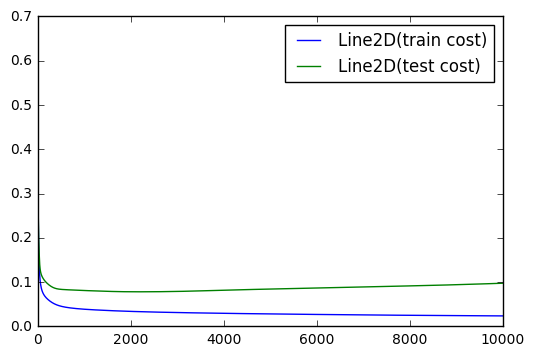

In [5]:
X,Y = get_data()
X,Y = shuffle(X,Y)
Y = Y.astype(np.int32)
M = 5 #hidden units in NN
D = X.shape[1]
K = len(set(Y))

Xtrain = X[:-100]
Ytrain = Y[:-100]
Ytrain_ind = y2indicator(Ytrain,K)

Xtest = X[-100:]
Ytest = Y[-100:]
Ytest_ind = y2indicator(Ytest,K)

W1 = np.random.randn(D,M)
b1 = np.zeros(M)
W2 = np.random.randn(M,K)
b2 = np.zeros(K)

def softmax(a):
    expA = np.exp(a)
    return expA/expA.sum(axis=1, keepdims=True)

def forward(X,W1,b1,W2,b2):
    Z= np.tanh(X.dot(W1)+b1)
    return softmax(Z.dot(W2)+b2), Z

def predict(P_Y_given_X):
    return np.argmax(P_Y_given_X, axis=1)

def classification_rate(Y,P):
    return np.mean(Y==P)

def cross_entropy(T,pY):
    return -np.mean(T*np.log(pY))

train_costs = []
test_costs = []
learning_rate = 0.001

for i in range(10000):
    pYtrain, Ztrain = forward(Xtrain,W1,b1, W2, b2)
    pYtest, Ztest = forward(Xtest,W1,b1,W2,b2)
    
    ctrain = cross_entropy(Ytrain_ind, pYtrain)
    ctest = cross_entropy(Ytest_ind,pYtest)
    train_costs.append(ctrain)
    test_costs.append(ctest)
    
    #gradient descent
    W2 -= learning_rate*Ztrain.T.dot(pYtrain-Ytrain_ind)
    b2 -= learning_rate*(pYtrain-Ytrain_ind).sum()
    dZ = (pYtrain-Ytrain_ind).dot(W2.T)*(1-Ztrain*Ztrain) #error
    W1 -= learning_rate*Xtrain.T.dot(dZ)
    b1 -= learning_rate*dZ.sum(axis=0)
    if i % 1000 == 0:
        print (i, ctrain, ctest)
print("Final train classification rate:", classification_rate(Ytrain, predict(pYtrain)))
print("Final test classification rate:", classification_rate(Ytest, predict(pYtest)))

legend1, = plt.plot(train_costs, label = 'train cost')
legend2, = plt.plot(test_costs, label = 'test cost')
plt.legend([legend1, legend2])
plt.show()
#97.8% accuracy train/92%test